In [1]:
import pandas as pd
import numpy as np
import spacy
sp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])    ### import English core language model from spaCy
# sp = spacy.load('en')

In [2]:
# import sys
# !conda install --yes --prefix {sys.prefix} spacy

###### did not work

# !conda install --yes --prefix {sys.prefix} textblob 
# !conda install --yes --prefix {sys.prefix} -c https://conda.anaconda.org/sloria textblob
# python -m textblob.download_corpora


#### worked from command line 
# conda install -c conda-forge textblob



In [3]:
##### to print multiple outputs from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
file_path = "/Users/tejasvibelsare/Documents/New_gold.xlsx"
train = pd.read_excel(file_path, sheet_name='Sheet1',usecols = "B,H")

In [5]:
##### information about dataset

len(train)                  ### length of training data
train.columns               #### get columns from data
train.category.value_counts()   #### get category wise count
train.head()           #### get top records from data
train.isnull().sum(axis = 0)   ### get null records
train.describe()

86

Index(['Contents', 'category'], dtype='object')

allergic      45
infectious    41
Name: category, dtype: int64

,Contents,category
0,My allergies killin my widdle eyes ??,allergic
1,Well think I woke up today with pink eye smh...,infectious
2,Seriously fuck allergies my eyes hurt and itch...,allergic
3,My eye itchin #allergies,allergic
4,November was hand foot and mouth. December is ...,infectious


Contents    0
category    0
dtype: int64

,Contents,category
count,86,86
unique,86,2
top,crap I forgot my eye drops =/ #allergies,allergic
freq,1,45


In [6]:
from nltk.stem import WordNetLemmatizer  
# nltk.download('wordnet')   ### to download wordnet. It was giving error without downloading
  
def lemmatize_tweets(each_tweet):
#     print(each_tweet)
    lemmatizer = WordNetLemmatizer()  
    words = each_tweet.split(" ")
    
    preprocessed_text = " ".join([lemmatizer.lemmatize(word) for word in words])
#     print(preprocessed_text)
    return preprocessed_text

# sentence = "My allergies have my eyes itching something crazy"

# sentence = lemmatize_tweets(sentence)
# # print(sentence)

In [7]:
def remove_usernames(each_tweet):

    usernames_removed_tweet = re.sub(r'@[A-Za-z0-9]+', '', each_tweet)
    return usernames_removed_tweet



In [8]:
def remove_url(each_tweet):

    url_removed_tweets = re.sub('https?://[A-Za-z0-9./]+', '', each_tweet)
    return url_removed_tweets



In [9]:
def remove_dots(each_tweet):
    dots = re.compile(r'\.{3,}')
    removed_dots_word = dots.sub('', each_tweet)
    return removed_dots_word



In [10]:
def remove_punctuation(each_tweet):
#     punctuations = "?:!.,;#=()/"
#     punctuation_removed_tweets = re.sub("?:!.,;#=()/ ", '', each_tweet)
    punctuation_removed_tweets = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', each_tweet)
    return punctuation_removed_tweets

In [11]:
# from textblob import TextBlob

# def calculate_sentiment(tweet):
# #     tweet = read_df['Contents'][i]
#     tweet = TextBlob(tweet)
#     pol = tweet.sentiment.polarity
#     sub = tweet.sentiment.subjectivity
#     return pol, sub

# # print(train.Contents)

In [12]:
# def get_tweet_length(tweet):
#     return len(tweet)

In [13]:
import re
# idx = pd.IndexSlice
# sentiment = pd.DataFrame()

def preprocess(data):
#     data.reset_index(drop=True, inplace=True)

    for index, row in data.iterrows():
        each_tweet = str(row["Contents"])
        
# #         polarity, subjectivity = calculate_sentiment(each_tweet)
# #         data.at[index,'polarity'] = polarity
# #         print(polarity)
# #         print(subjectivity)
# #         data.at[index,'subjectivity'] = subjectivity
#         data.loc[index,'polarity'] = polarity
#         data.loc[index,'subjectivity'] = subjectivity
        
#         length = get_tweet_length(each_tweet)
#         data.loc[index,'tweet_length'] = length
        
#         data.loc[idx[index,:], 'polarity'] = polarity

        
        url_removed_tweets = remove_url(each_tweet)
        
        usernames_removed_tweet = remove_usernames(url_removed_tweets)
        
        punctuation_removed_tweets = remove_punctuation(usernames_removed_tweet)
        
        numbers_removed_tweets = punctuation_removed_tweets.replace('\d+', '')
        
        removed_dots_word = remove_dots(numbers_removed_tweets)
        
        if type(removed_dots_word) is str:
            lower_case_tweet = removed_dots_word.lower()
            
#         punctuation_removed_tweets = remove_punctuation(lower_case_tweet)
        
#         removed_dots_word = remove_dots(punctuation_removed_tweets)
        
#         url_removed_tweets = remove_url(removed_dots_word)
        
#         usernames_removed_tweet = remove_usernames(url_removed_tweets)

        lemmatized_tweet= lemmatize_tweets(lower_case_tweet)
        data.at[index,'Contents'] = lemmatized_tweet
        
#         print(data.head)

    return data


In [14]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

print(type(train))
train.reset_index(drop=True, inplace=True)
train = preprocess(train)
# print(train)

encode = preprocessing.LabelEncoder()
# train['category'] = encode.fit_transform(train['category'])
train['category'] = encode.fit_transform(train['category'])

tfidf = TfidfVectorizer(min_df=2,stop_words='english')

traintf = tfidf.fit_transform(train.Contents)
# print(traintf)

train_df = pd.DataFrame(traintf.todense())
train_df.columns = tfidf.get_feature_names()


<class 'pandas.core.frame.DataFrame'>


In [15]:
# encode.inverse_transform('0')
# print(train['category'])

print(train)


                                             Contents  category
0                    my allergy killin my widdle eye          0
1        well think i woke up today with pink eye smh         1
2   seriously fuck allergy my eye hurt and itch so...         0
3                               my eye itchin allergy         0
4   november wa hand foot and mouth december is i ...         1
5                                  allergy ugh my eye         0
6                                i have pink eye cool         1
7                                 i have pink eye fml         1
8   know how to feel like a kid again get a case o...         1
9                    allergy seasonmy eye itch so bad         0
10                     i woke up with pink eye wtffff         1
11                  my allergy omg my eye i cant deal         0
12  i have pink eye and a kid threw a pencil at me...         1
13                     pretty sure i have pink eye tf         1
14  thanks timehop for reminding me that

In [16]:
### wrire in csv
dataframe = pd.DataFrame(train.Contents)
dataframe = dataframe.join(train_df)

classified = pd.DataFrame(train.category)
dataframe = dataframe.join(classified)

dataframe.to_csv("/Users/tejasvibelsare/Documents/complete_frame.csv", encoding='utf-8')
train_df.to_csv("/Users/tejasvibelsare/Documents/features.csv", encoding='utf-8')


In [17]:
train_df

,allergy,baby,bad,breathe,camp,case,child,cool,damn,drop,...,think,throat,time,today,tonight,viral,wa,watering,woke,wtf
0,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.439141,0.000000,0.000000,0.487603,0.000000,0.0,0.000000,0.000000,0.487603,0.000000
2,0.183742,0.000000,0.415670,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.404066,0.000000,...,0.384963,0.000000,0.000000,0.000000,0.000000,0.0,0.457589,0.000000,0.000000,0.457589
5,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.906410,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.638466,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.317343,0.000000,0.717908,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [33]:
dataframe

,Contents,allergy,baby,bad,breathe,camp,case,child,cool,damn,...,throat,time,today,tonight,viral,wa,watering,woke,wtf,category
0,my allergy killin my widdle eye,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,well think i woke up today with pink eye smh,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.487603,0.000000,0.0,0.000000,0.000000,0.487603,0.000000,1
2,seriously fuck allergy my eye hurt and itch so...,0.183742,0.000000,0.415670,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
3,my eye itchin allergy,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
4,november wa hand foot and mouth december is i ...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.404066,...,0.000000,0.000000,0.000000,0.000000,0.0,0.457589,0.000000,0.000000,0.457589,1
5,allergy ugh my eye,0.854767,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
6,i have pink eye cool,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.906410,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
7,i have pink eye fml,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
8,know how to feel like a kid again get a case o...,0.000000,0.000000,0.000000,0.0,0.000000,0.638466,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
9,allergy seasonmy eye itch so bad,0.317343,0.000000,0.717908,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0


In [18]:
# # print(tfidf)
# type(tfidf)
# # tfidf.toarray()
# print(X_train)

train['Contents'][8]

'know how to feel like a kid again get a case of pink eye ack'

In [19]:
from sklearn.model_selection import KFold



kf = KFold(n_splits=5)
kf.get_n_splits(train)
# print(kf)
# tfidf = TfidfVectorizer(min_df=2,stop_words='english')
# tfidf_X_train = tfidf.fit_transform(train.Contents)


def performance_measures(model):
    acc = []
    pre = []
    rec = []
    f1 = []
    test = []
    predict = []
    probability = []
    fold = pd.DataFrame()

    conf_matrix = np.zeros((2,2))
    
    for train_index, test_index in kf.split(train_df):
#         print("TRAIN:", train_index, "TEST:", test_index)        #### printing indices of folds

        X_train, X_test = train_df.iloc[train_index], train_df.iloc[test_index]
        y_train, y_test = classified.iloc[train_index], classified.iloc[test_index]
        
        print(y_test.dtypes)
        model = model 
        model.fit(X_train,y_train)
        
#         # Calculate feature importances
#         importances = model.feature_importances_
#         print(importances)

        y_pred = model.predict(X_test)
        probas = model.predict_proba(X_test)
        precision, recall, F1, _ = list(precision_recall_fscore_support(y_test,y_pred, beta=1.0, average="binary"))
        accuracy = accuracy_score(y_test,y_pred)
        matrix = confusion_matrix(y_test,y_pred)
        conf_matrix = conf_matrix.__add__(matrix)

        
        dataframe = pd.DataFrame(train.Contents)
        dataframe = dataframe.join(train_df)
        per_fold = pd.DataFrame(train.iloc[test_index])
        predicted_df = pd.DataFrame(y_pred.astype(int))
#         predicted_df = pd.DataFrame(y_pred)
        predicted_df.columns = ['predicted']
        predicted_df.reset_index(drop=True, inplace=True)
        per_fold.reset_index(drop=True, inplace=True)
        X_test.reset_index(drop=True, inplace=True)
#         per_fold = per_fold.join(predicted_df)
#         pd.merge(per_fold,predicted_df)
        per_fold = pd.concat([per_fold,predicted_df], axis=1)
        per_fold = per_fold.join(X_test)
        fold = fold.append(per_fold)
#         print(per_fold)
        
        
        
#         print(predicted_df)
        test.extend(y_test)
        predict.extend(y_pred)
#         y_pred.dtypes()
        probability.extend(probas[:, 1])
    
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        f1.append(F1)
        
    print(model)
    print(conf_matrix)
    fold['match'] = fold.category.eq(fold.predicted)
    
    query = False
    wrong_predicted = pd.DataFrame(fold[fold['match'] == query])
    wrong_predicted.to_csv("/Users/tejasvibelsare/Documents/wrong_predicted_training.csv", encoding='utf-8')

#     print(fold.where(fold['match']== False))
    
#     print(fold)
    fold.to_csv("/Users/tejasvibelsare/Documents/fold_wise_comparison.csv", encoding='utf-8')
    
#     probas =  model.predict_proba(X_test)
    
#     plot_roc(test,probability)
    
    return test, predict, acc, pre, rec, f1

    

5

In [20]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm

model_naive = MultinomialNB()
# modelSVM = svm.SVC(kernel='linear',probability=True)

test, predict, acc, pre, rec, f1 = performance_measures(model_naive)
all_folds_performance = {'Accuracy':acc, 'Precision': pre, 'Recall':rec, 'F1': f1}
naive_model_perf = {'acc':np.mean(acc), 'pre':np.mean(pre),'rec':np.mean(rec),'f1':np.mean(f1)}

category    int64
dtype: object
category    int64
dtype: object
category    int64
dtype: object
category    int64
dtype: object
category    int64
dtype: object
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
[[44.  1.]
 [ 0. 41.]]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [21]:
# #### tfidf vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(min_df=2,stop_words='english')
# traintfidf = tfidf.fit_transform(train.Contents)
# traintfidf.ndim
# type(traintfidf)

In [22]:
# traintfidf.toarray()
# traintfidf.getnnz()
# traintfidf.shape

In [23]:
naive_model_perf
all_folds_performance

{'acc': 0.9882352941176471, 'pre': 0.975, 'rec': 1.0, 'f1': 0.9866666666666667}

{'Accuracy': [1.0, 1.0, 1.0, 1.0, 0.9411764705882353],
 'Precision': [1.0, 1.0, 1.0, 1.0, 0.875],
 'Recall': [1.0, 1.0, 1.0, 1.0, 1.0],
 'F1': [1.0, 1.0, 1.0, 1.0, 0.9333333333333333]}

In [24]:
classified.shape
train_df.shape

(86, 1)

(86, 53)

In [25]:

def predict(model, X_gold, y_gold,X_predict, classified_by_crimson):
    
    
    model = model 
    model.fit(X_gold,y_gold)
    y_pred = model.predict(X_predict.toarray())
    y_predicted = pd.DataFrame(y_pred.astype(int))
    probas = model.predict_proba(X_gold)
    
#     print(type(classified_by_crimson))
#     print(type(y_pred))
    
#     print(classified_by_crimson)
#     print(y_pred)
#     print(classified_by_crimson.dtypes)
#     classified_by_crimson.value_counts()
#     y_predicted.value_counts()
    
    precision, recall, F1, _ = list(precision_recall_fscore_support(classified_by_crimson,y_predicted, beta=1.0, average="binary"))
    
    
    accuracy = accuracy_score(classified_by_crimson,y_predicted)
#     matrix = confusion_matrix(classified_by_crimson,y_pred)
#     conf_matrix = conf_matrix.__add__(matrix)

#     answer = pd.concat([classified_by_crimson,y_predicted], axis=1)
#     X_predict.reset_index(drop=True, inplace=True)
#     answer = answer.join(X_predict)
# #     answer = pd.concat([X_predict, answer], axis=1)
#     print(answer)
  
#     "There are %d births" % (births,)
    print("Precision : %.10f" % (precision,))
    print("Recall : %.10f" % (recall,))
    print("F1 : %.10f" % (F1,))
    print("Accuracy : %.10f" % (accuracy,))
    
    return y_predicted
    

In [26]:
file_path = "/Users/tejasvibelsare/Documents/Twitter10K.xlsx"
test = pd.read_excel(file_path, sheet_name='Sheet1',usecols = "B,L")
# test = pd.read_excel(file_path, sheet_name='Sheet1',usecols = "B")
# test

print(type(test))
test.reset_index(drop=True, inplace=True)
test = preprocess(test)

# print(test)

# train = pd.read_excel(file_path, sheet_name='Sheet1',usecols = "B,H")

testtfidf = tfidf.transform(test['Contents'].apply(lambda x: np.str_(x)))

# testtfidf = tfidf.transform(test.Contents)
testtfidf.shape
# test_gold = pd.DataFrame(testtfidf.todense())
# test_gold.shape
# # test_gold.columns = test_gold.get_feature_names()

Mode_classified = test.loc[:, "classified"].mode() 
test = test.fillna({"classified":Mode_classified[0]})

classified_10K = test["classified"]
# classified_by_crimson = classified_by_crimson.dropna(how='all')


# classified = classified_by_crimson["classified"]
classified_10K.isnull().values.any()
# classified_10K.astype('int64')

# classified_10K.value_counts()

# classified_10K.to_csv("/Users/tejasvibelsare/Documents/error.csv", encoding='utf-8')

classified_by_crimson = pd.DataFrame(classified_10K)

classified_by_crimson.shape



<class 'pandas.core.frame.DataFrame'>


(4800, 53)

False

(4800, 1)

In [27]:
print(test)

                                               Contents  classified
0     so im finally feeling better just have a bad c...         1.0
1                 i have pink eye in both eyesthis blow         1.0
2     some girl had pinkeye in my school today and w...         1.0
3     i bet people think im high but i actually just...         1.0
4      hahahahaha me too i got an mc hahaha saw the ...         0.0
5            im pretty sure i have fucking pink eye fml         1.0
6       i would not suggest getting pink eye cuz it ...         1.0
7     i watched the vlog where  got pink eye and now...         1.0
8                    i gots pink eye in both of my eye          1.0
9          i just had to put eye allergy drop in my eye         0.0
10                                i have an eye allergy         0.0
11    conjunctivitis in my eye    3\n\nfml worsttime...         1.0
12    i couldnt go to tennis tryout bc i have pink e...         1.0
13                                  i have pink 

In [28]:
# np.isnan(train_df)
# np.isnan(classified)


classified = pd.DataFrame(classified)
# predicted_values = predict(modelSVM, train_df, classified, testtfidf, classified_by_crimson)
predicted_values = predict(model_naive, train_df, classified, testtfidf, classified_by_crimson)


predicted_values.columns = ['model_prediction']

print(type(testtfidf))

test_tfidf = pd.DataFrame(testtfidf.todense())
test_tfidf.columns = tfidf.get_feature_names()

compare = pd.concat ([test,test_tfidf], axis=1)
compare = pd.concat([compare,predicted_values], axis=1) 

compare['match'] = compare.classified.eq(compare.model_prediction)
    
query = False
wrong_predicted = pd.DataFrame(compare[compare['match'] == query])
# predicted_df.reset_index(drop=True, inplace=True)
# per_fold.reset_index(drop=True, inplace=True)

compare.to_csv("/Users/tejasvibelsare/Documents/error.csv", encoding='utf-8')
wrong_predicted.to_csv("/Users/tejasvibelsare/Documents/model_wrong_predicted.csv", encoding='utf-8')



# train_df = pd.DataFrame(traintf.todense())
# train_df.columns = tfidf.get_feature_names()


Precision : 0.9901477833
Recall : 0.9710144928
F1 : 0.9804878049
Accuracy : 0.9983333333
<class 'scipy.sparse.csr.csr_matrix'>


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
testtfidf.toarray()

array([[0.        , 0.        , 0.44303615, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45586203, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24623381, 0.        , 0.55704164, ..., 0.        , 0.        ,
        0.        ]])

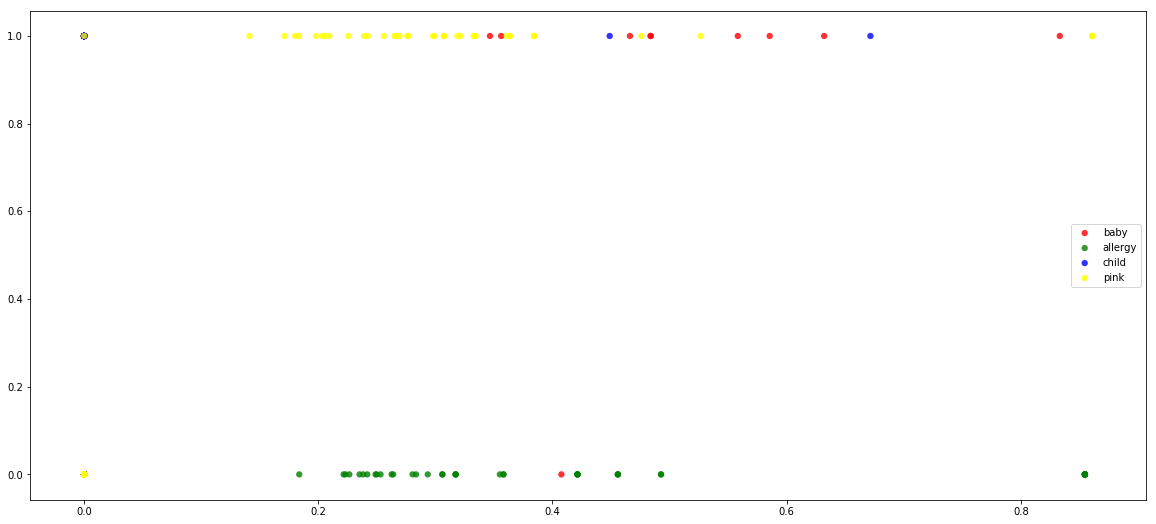

In [52]:
import numpy as np
import matplotlib.pyplot as plt


g1 = dataframe['baby'].tolist()
g2 = dataframe['allergy'].tolist()
g3 = dataframe['child'].tolist()
g4 = dataframe['pink'].tolist()

data = (g1, g2, g3, g4)
colors = ("red", "green", "blue","yellow")
groups = ("baby", "allergy", "child","pink")

# Create plot
plt.rcParams['figure.figsize'] = [20, 9]
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data,dataframe['category'].tolist()
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=40, label=group)

# plt.title('Matplot scatter plot')
plt.legend(loc=5)
plt.show()